# Shap
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 17.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import shap
import sklearn

# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
y[0:10]

array([0.694, 4.846, 2.893, 1.594, 1.446, 0.643, 1.029, 1.704, 1.475,
       3.556])

In [7]:
X[0:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2732,1.3882,15.0,3.929530,1.100671,1024.0,3.436242,32.80,-115.56
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
9225,2.2375,19.0,4.742105,0.963158,700.0,3.684211,36.94,-120.06
14116,2.2375,24.0,4.381737,1.053892,2005.0,3.001497,32.73,-117.10
14935,4.9792,11.0,6.400826,1.012397,1391.0,2.873967,32.64,-117.00
15430,2.4505,25.0,4.225389,1.075130,1045.0,2.707254,33.20,-117.24
15832,4.7946,52.0,5.010965,1.116228,839.0,1.839912,37.75,-122.43


In [26]:
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12900,2.7181,23.0,4.867500,1.022500,866.0,2.165000,38.63,-121.33
3922,5.4548,35.0,5.585714,1.028571,425.0,3.035714,34.19,-118.56
9120,3.2750,32.0,5.576779,1.146067,774.0,2.898876,34.58,-118.10
13310,4.6167,11.0,4.694836,0.917840,1503.0,3.528169,34.09,-117.61
18873,3.1053,37.0,5.447674,1.044574,1574.0,3.050388,38.08,-122.22
...,...,...,...,...,...,...,...,...
13537,4.3438,33.0,6.180769,1.084615,608.0,2.338462,34.15,-117.30
3280,2.0417,24.0,6.979911,1.504464,1015.0,2.265625,39.08,-122.86
16734,3.3816,36.0,4.761589,1.079470,1649.0,2.184106,37.68,-122.40
1614,7.6202,27.0,7.122078,0.987013,2212.0,2.872727,37.86,-122.09


In [8]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


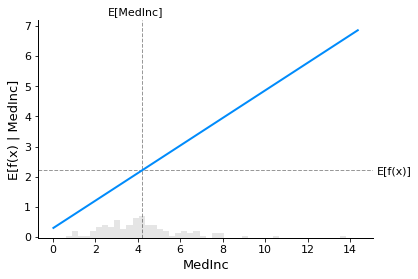

In [9]:
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Exact explainer: 1001it [00:13, 29.79it/s]                          


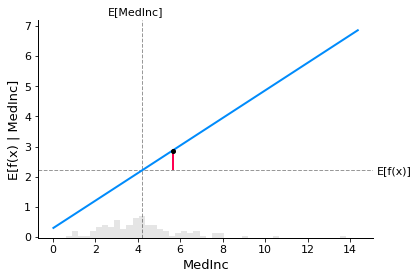

In [10]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 30
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [30]:
shap_values[sample_ind:sample_ind+1,:]


.values =
array([[ 0.65112374, -0.26712388, -0.13327599,  0.01518622,  0.0636734 ,
         0.19988713,  0.92667985, -0.91809486]])

.base_values =
array([2.21473983])

.data =
array([[ 5.64360000e+00,  6.00000000e+00,  6.57475083e+00,
         1.07392027e+00,  2.74100000e+03,  2.27657807e+00,
         3.30500000e+01, -1.17050000e+02]])

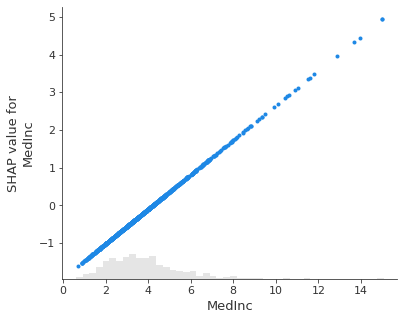

In [31]:
shap.plots.scatter(shap_values[:,"MedInc"])

In [36]:
X.iloc[30]

MedInc           5.643600
HouseAge         6.000000
AveRooms         6.574751
AveBedrms        1.073920
Population    2741.000000
AveOccup         2.276578
Latitude        33.050000
Longitude     -117.050000
Name: 15186, dtype: float64

In [ ]:
=

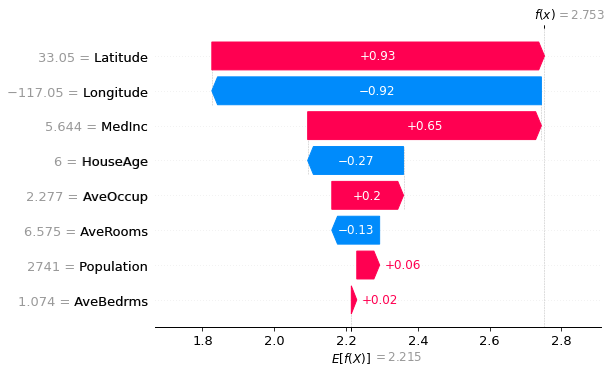

In [32]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

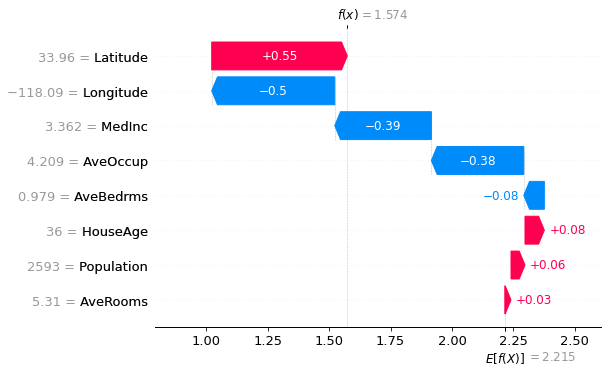

In [33]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
sample_ind=351
shap.plots.waterfall(shap_values[sample_ind], max_display=14)